<a href="https://colab.research.google.com/github/Zeynep-Dogan/IE-423/blob/main/IE_423_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#475468'> Online Shoppers Purchasing Intention:

#Initialize

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load and Explain Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfshopping = pd.read_csv('/content/drive/MyDrive/ie 423/FINAL_online_shoppers_intention.csv')

In [4]:
#first few columns of the dataset + names of the features can be seen
dfshopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
dfshopping.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


This descriptions tell a lot about the data set. For instance, we can see which features are categorical or numeric. Only seen categorical features are Month, Visitor Type, Weekend, and Revenue. Other features are considered as numeric.

(Revenue will be predicted so it is not actually a feature.)

## Plotting

Lets see the graphs of each variable with the target variable(Revenue).

### Categorical Features

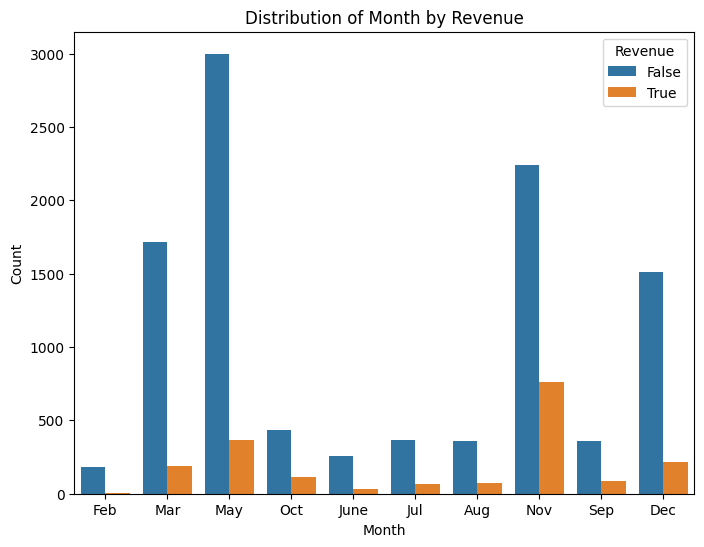

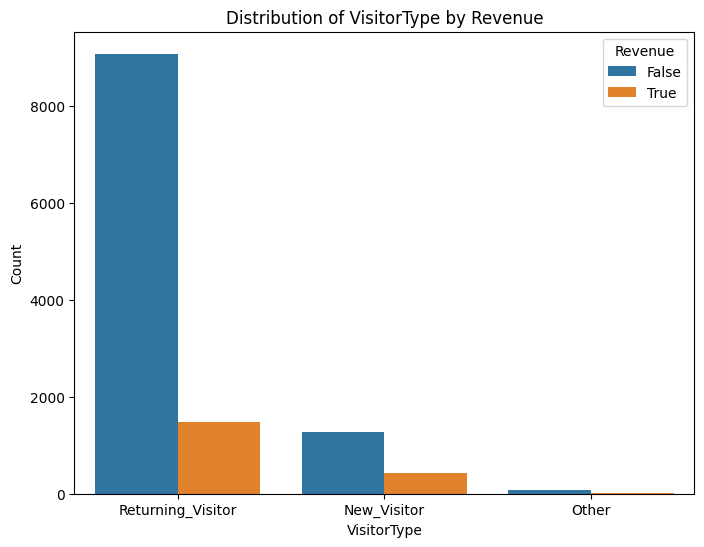

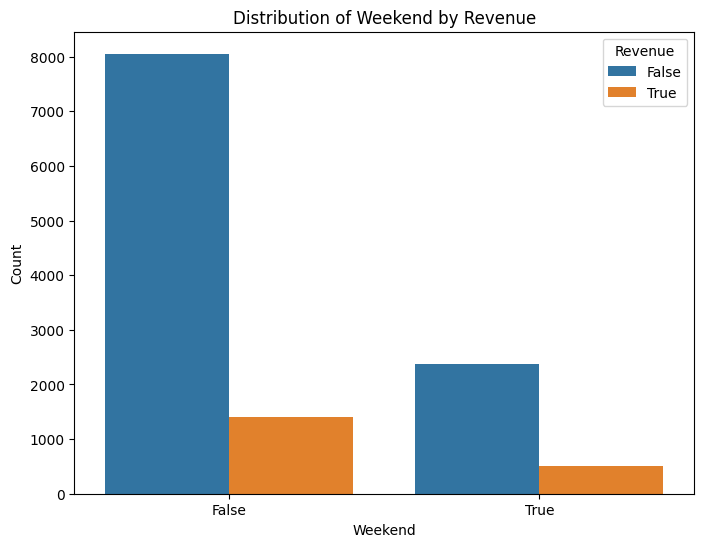

In [6]:
# first start with Categorical Features
categorical_features = ['Month', 'VisitorType', 'Weekend']
for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, hue='Revenue', data=dfshopping)
  plt.title(f'Distribution of {feature} by Revenue')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.legend(title='Revenue')
  plt.show()

**Month:** For each month purchase rate is low since the number of falses are always higher. Highest purchase count is on November while the lowest is on February. Also, some months are missing like January and April. Additionally, highest visitor rate is on Februarcy.

**Visitor Type:** Number of returning visitors is very high but new visitors are more likely to make purchases.

**Weekend:** Even if there is not a big difference during weekend there is more purchases (ratio).


### Numerical Features

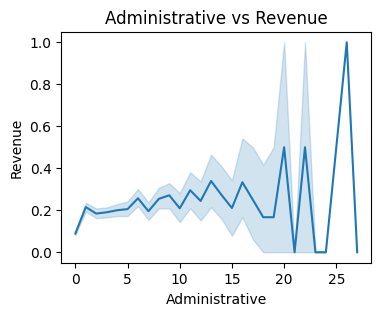

In [7]:
plt.figure(figsize=(4, 3))
sns.lineplot(x="Administrative", y='Revenue', data=dfshopping)
plt.title("Administrative vs Revenue")
plt.xlabel('Administrative')
plt.ylabel("Revenue")
plt.show()

**Administrative:** The plot suggests that as number of administrative pages increase, there is a general trend of higher revenue. However, the relationship is not strong, as there are many outliers, indicating that high number of administrative pages still have low revenue and vice versa.

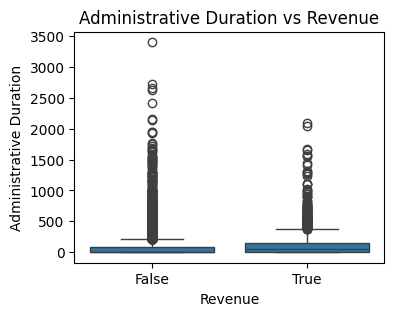

In [8]:
plt.figure(figsize=(4, 3))
sns.boxplot(y="Administrative_Duration", x='Revenue', data=dfshopping)
plt.title("Administrative Duration vs Revenue")
plt.xlabel('Revenue')
plt.ylabel("Administrative Duration")
plt.show()

**Administrative Duration:** Most visitors, whether they made a purchase or not, spent little time on these pages. However, some non-purchasing visitors spent significantly more time on account management, indicated by the larger number of extreme outliers in the "False" group.

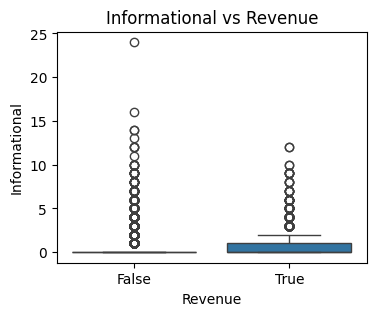

In [9]:
plt.figure(figsize=(4, 3))
sns.boxplot(y="Informational", x='Revenue', data=dfshopping)
plt.title("Informational vs Revenue")
plt.xlabel('Revenue')
plt.ylabel("Informational")
plt.show()

**Informational:** It shows that visitors who made a purchase tend to visit more informational pages compared to those who did not since the median and interquartile range is higher for the "True" group. Many non-purchasing visitors did not visit any informational pages, with the median for the "False" group at zero. there are stiil outliers in both groups indicate that some visitors, regardless of purchase behavior, explored a significantly higher number of informational pages.

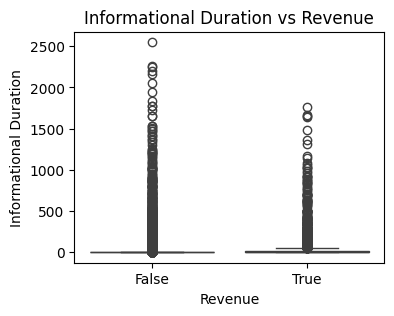

In [10]:
plt.figure(figsize=(4, 3))
sns.boxplot(y="Informational_Duration", x='Revenue', data=dfshopping)
plt.title("Informational Duration vs Revenue")
plt.xlabel('Revenue')
plt.ylabel("Informational Duration")
plt.show()

**Informational Duration:** There is no significant affect of informational duration on the revenue since the box is almost invisible and there are many outliers.

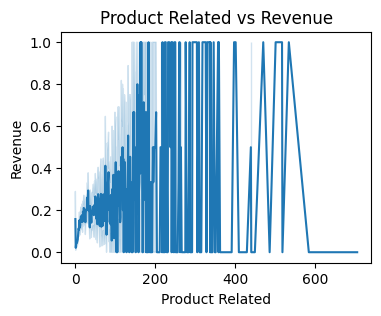

In [11]:
plt.figure(figsize=(4, 3))
sns.lineplot(x="ProductRelated", y='Revenue', data=dfshopping)
plt.title("Product Related vs Revenue")
plt.xlabel('Product Related')
plt.ylabel("Revenue")
plt.show()

**Product Related:** When the Number of product related pages low and high the the visitor don't make purcahses but when it is between approx. 140-540 visitors make purchases.

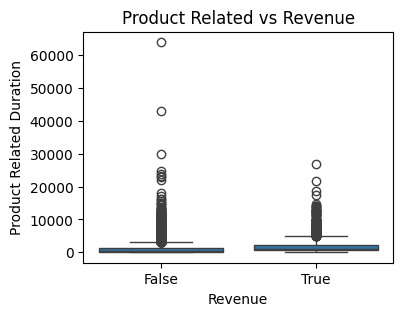

In [12]:
plt.figure(figsize=(4, 3))
sns.boxplot(y="ProductRelated_Duration", x='Revenue', data=dfshopping)
plt.title("Product Related vs Revenue")
plt.xlabel('Revenue')
plt.ylabel("Product Related Duration")
plt.show()

Products Related Duration: Again there is no significant affect of duration on the revenue since the box is almost invisible and there are many outliers.

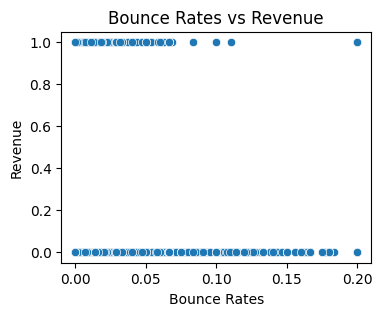

In [13]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x="BounceRates", y='Revenue', data=dfshopping)
plt.title("Bounce Rates vs Revenue")
plt.xlabel('Bounce Rates')
plt.ylabel("Revenue")
plt.show()

** Bounce Rates:** as the bounce rates are lower the visitors are more likely to make purchase.

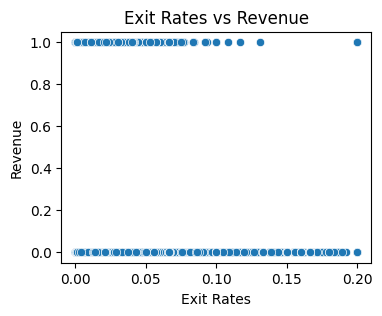

In [14]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x="ExitRates", y='Revenue', data=dfshopping)
plt.title("Exit Rates vs Revenue")
plt.xlabel('Exit Rates')
plt.ylabel("Revenue")
plt.show()

This is same for the Exit Rates.

They (Bounce and Exit Rates) are bad for the page since they show people leave the site so this relationshio is predictable.

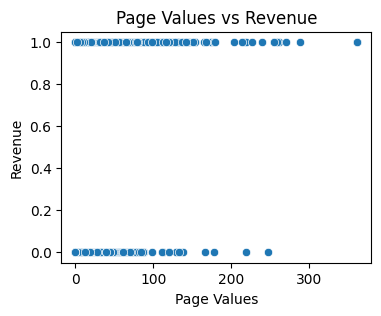

In [15]:
plt.figure(figsize=(4, 3))
sns.scatterplot(x="PageValues", y='Revenue', data=dfshopping)
plt.title("Page Values vs Revenue")
plt.xlabel('Page Values')
plt.ylabel("Revenue")
plt.show()

As again predicted as the average number of pages increases a person makes a purchase increases the likelihood of that purchase. When a person makes that much research on something they are more likely to but it.

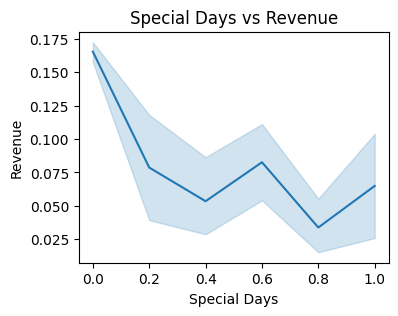

In [16]:
plt.figure(figsize=(4, 3))
sns.lineplot(x="SpecialDay", y='Revenue', data=dfshopping)
plt.title("Special Days vs Revenue")
plt.xlabel('Special Days')
plt.ylabel("Revenue")
plt.show()

As the visit time gets close to a special day possibility of the purchase incrase because gift giving is important. However, if there is no special day coming up people don't make purchases.

Other features can also be considered as categorical.

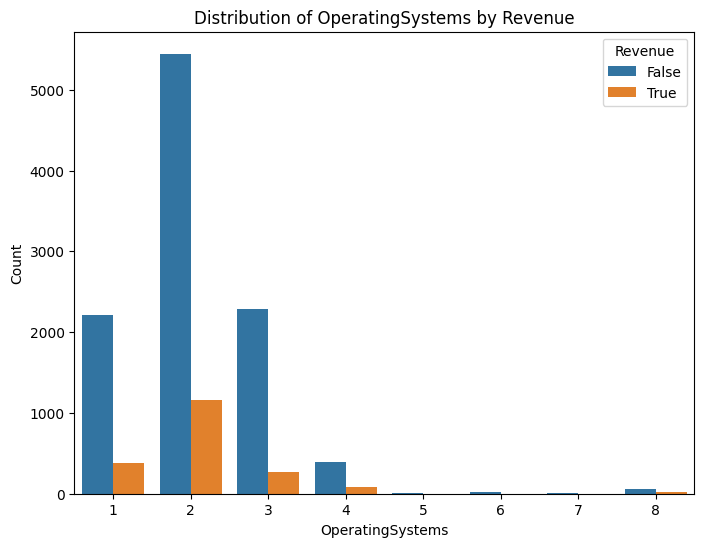

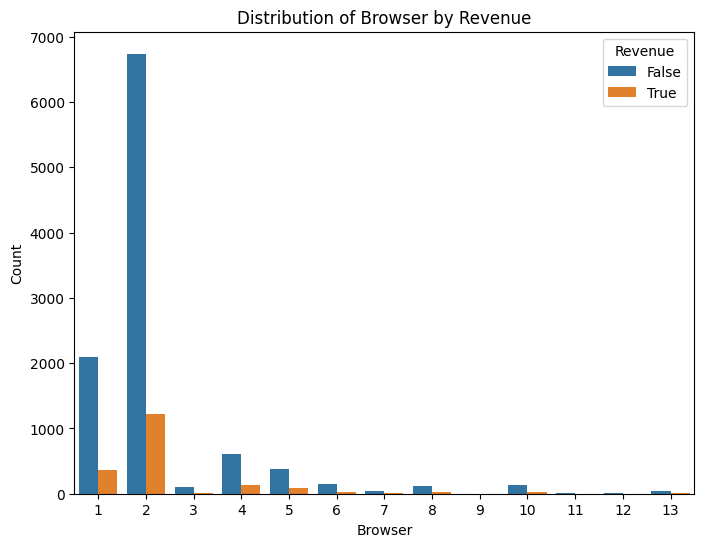

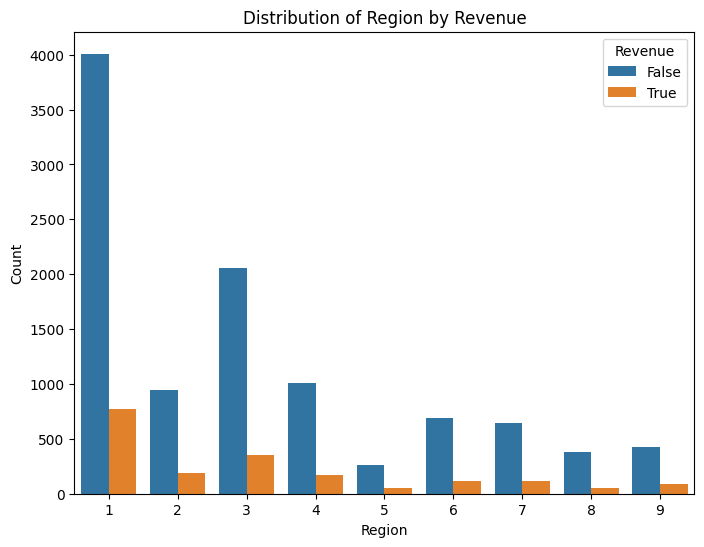

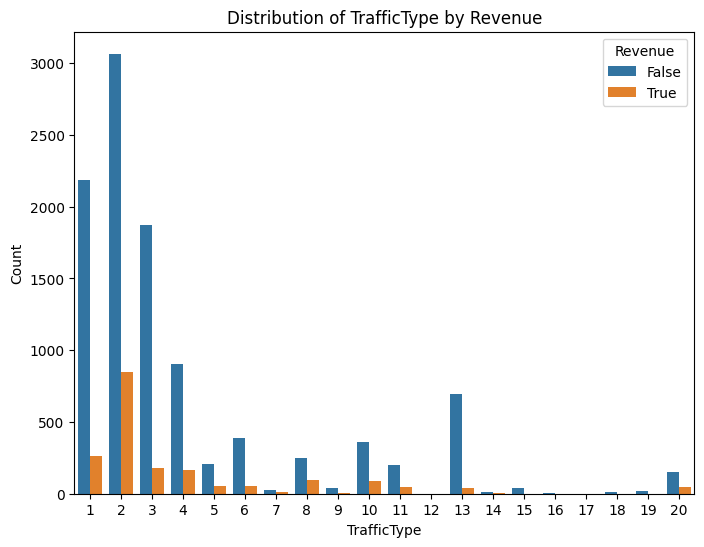

In [17]:
categorical_features2 = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']
for feature in categorical_features2:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, hue='Revenue', data=dfshopping)
  plt.title(f'Distribution of {feature} by Revenue')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.legend(title='Revenue')
  plt.show()

Visitors with low Traffic Type, Region, Browser, and Operating System Numbers visits the webpages more frquently (prob. regardless of the Revenue type). So, I think they are unrelated.

# Data Preproccessing

## Missing Data

In [18]:
dfshopping.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


There is no missing data in the data set.

## Encoding

We already know the categorical features but to be sure we will reassign it.

In [19]:
categorical_features = ['Month', 'VisitorType', 'Weekend', 'Revenue']

Also we want to make our target variable(Revenue) numerical. So, we are also adding it.

In [20]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoder to each column
label_encoder = LabelEncoder()
for col in categorical_features:
    dfshopping[col] = label_encoder.fit_transform(dfshopping[col])

In [21]:
dfshopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


As we can see the categorical features are encoded.

## Standardizing(Scaling)

In [22]:
from sklearn.preprocessing import scale
numerical_features = scale(dfshopping.drop(['Revenue','Month', 'VisitorType', 'Weekend'], axis=1))

# Feature Engineering/Correlation Matrix

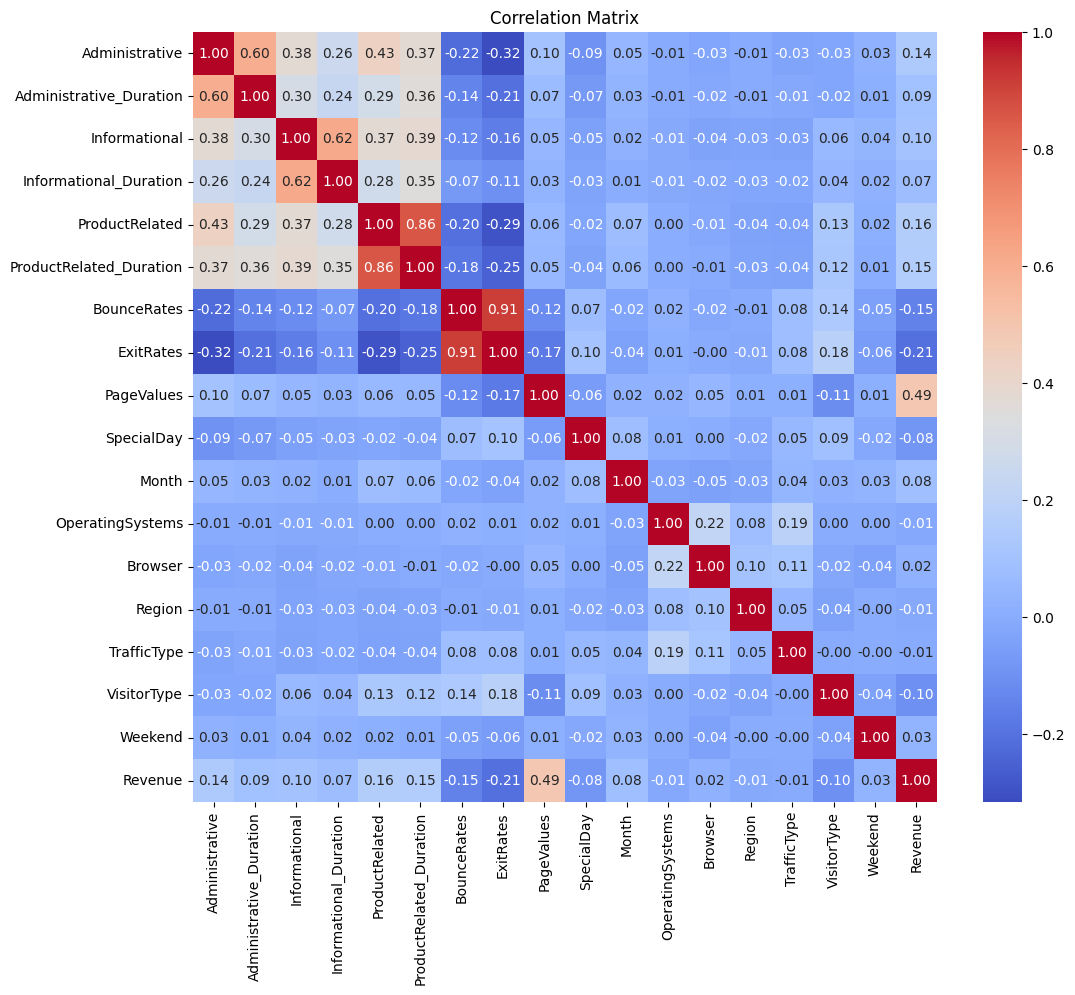

In [23]:
corr_matrix = dfshopping.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

There are a lot of negative correlation between features.

There is a very strong correlation between Exit and Bounce Rates since they are both related to visitors leaving the webpage.

There is for sure correlation between a specific type of webpage and the duration in that webpage (ex. between Administrative and Administrative duration).

There is also a high correlation between Page Values (number of pages visited before the purchase) and revenue since as people make more research on a topic/product they are more likely to buy the related product.

# Model Building

We will train different models to compare and contrast and decide on the better one based on approriate metrices.

First, we will start by splitting data into trainin and testing data.


In [24]:
from sklearn.model_selection import train_test_split

X= dfshopping.drop('Revenue', axis=1)
y= dfshopping['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

## Logistic Regression

In [25]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression


mdlLgrshopping = LogisticRegression(random_state=1)
mdlLgrshopping.fit(X_train, y_train)
y_test_pred = mdlLgrshopping.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Display model results using confusion matrix
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[2050   65]
 [ 201  150]]


In [27]:
# Calculate evaluation metrics
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

# ROC-AUC
from sklearn.metrics import roc_auc_score

print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test, y_test_pred))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2115
           1       0.70      0.43      0.53       351

    accuracy                           0.89      2466
   macro avg       0.80      0.70      0.73      2466
weighted avg       0.88      0.89      0.88      2466

AUC Score (Logistic Regression):
0.6983087834151663


A higher value for the area under this ROC curve, which is **AUC**, signifies a better model.

Our AUC Score is approx. 0.70 which means that the model has a 70% chance of correctly distinguishing between positive and negative classes. This is generally considered a good score, indicating a reasonably strong model, but we can improve this.

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

mdlDtrshopping = DecisionTreeRegressor(random_state=1)
mdlDtrshopping.fit(X_train, y_train)

# Predict test data
y_test_pred = mdlDtrshopping.predict(X_test)

In [29]:
# Calculating  accuracy, precision, recall,F1-score, ROC-AUC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

clfshopping = DecisionTreeClassifier(random_state=42)

# Train the model
clfshopping.fit(X_train, y_train)

# Make predictions
y_pred = clfshopping.predict(X_test)
y_prob = clfshopping.predict_proba(X_test)[:, 1]

# Display model results using confusion matrix
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[1921  194]
 [ 168  183]]


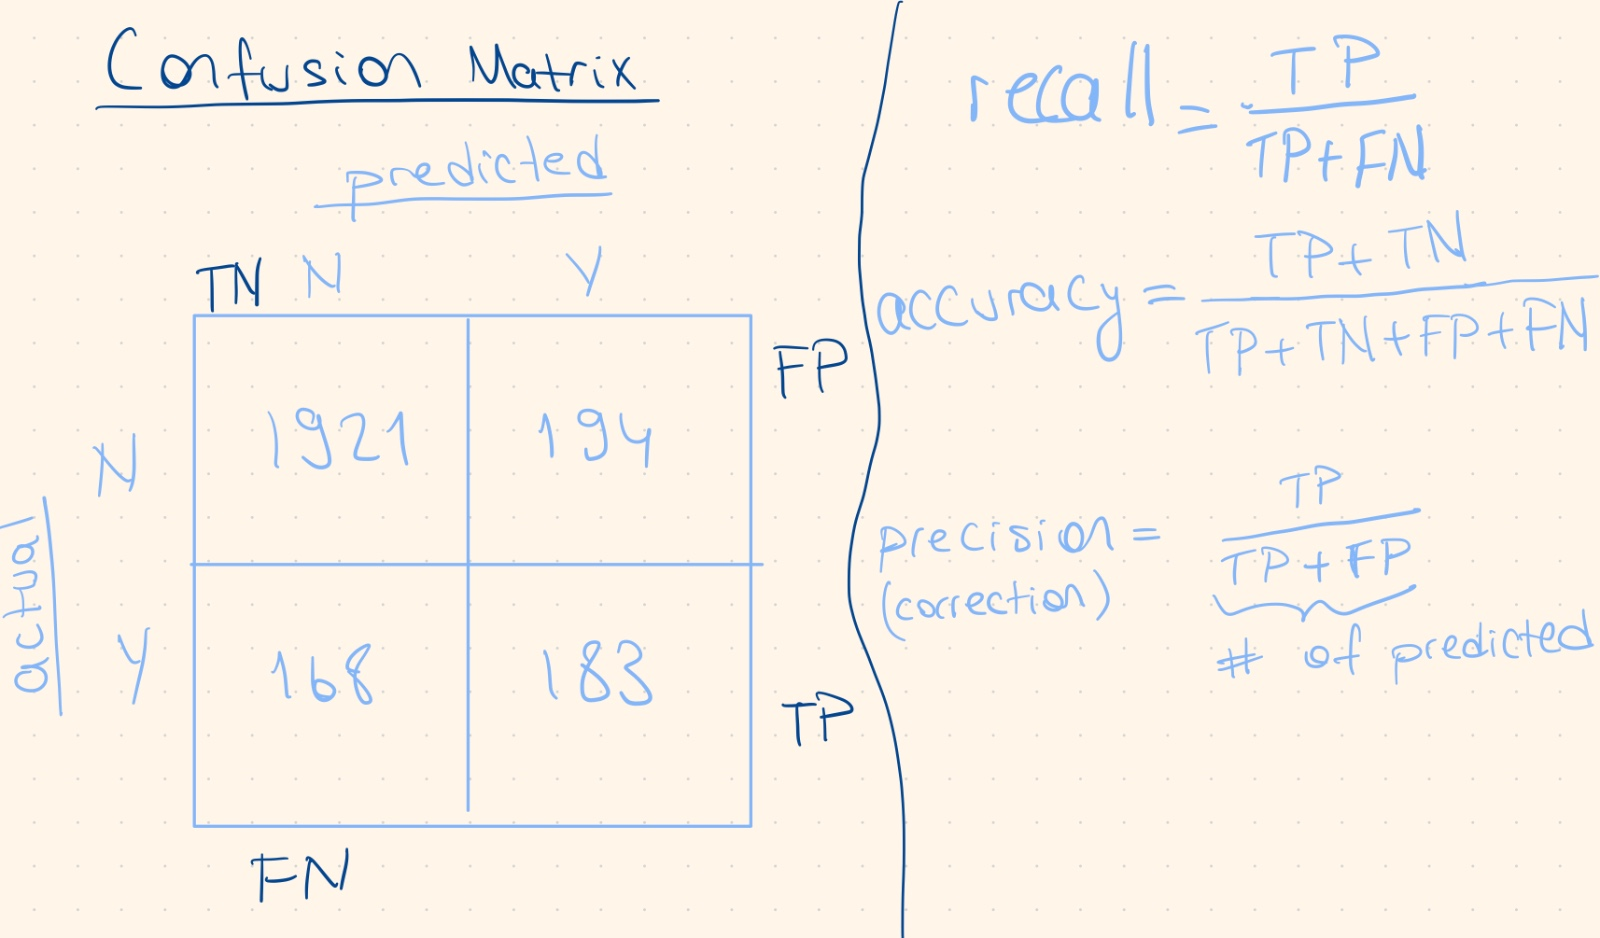

In [30]:
# Calculate evaluation metrics
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-Score
f1 = f1_score(y_test, y_pred)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.8544201135442011
Precision: 0.4899497487437186
Recall: 0.5555555555555556
F1-Score: 0.520694259012016
ROC-AUC: 0.7297872340425531


Our AUC Score is approx. 0.73 which is higher tan Logistic Regression. This means that the model has a 73% chance of correctly distinguishing between positive and negative classes. This is generally considered a good score, indicating a reasonably strong model, though there may still be room for improvement.

## Random Forest

Random Forest model uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters.

So we will be using this model to see if it has a higher AUC Score.

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Define random forest model
mdlRfsshopping = RandomForestClassifier(random_state=1)

# Fit model
mdlRfsshopping.fit(X_train, y_train)

# Predict
y_test_pred = mdlRfsshopping.predict(X_test)
y_test_prob = mdlRfsshopping.predict_proba(X_test)[:, 1]

In [32]:
# Display model results using confusion matrix
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[2034   81]
 [ 148  203]]


In [33]:
# Calculate evaluation metrics
from sklearn.metrics import classification_report

print ('Classification Report (Random Forest):')
print (classification_report(y_test, y_test_pred))

# ROC-AUC
from sklearn.metrics import roc_auc_score

print ('AUC Score (Random Forest):')
print (roc_auc_score(y_test, y_test_pred))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2115
           1       0.71      0.58      0.64       351

    accuracy                           0.91      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.90      0.91      0.90      2466

AUC Score (Random Forest):
0.7700248530035764


Using Random Forest significantlly changes the AUC Score to approx. 0.77 and indicates that the model is fairly effective, with a 77% chance of correctly distinguishing between positive and negative classes. This is considered a good score, suggesting the model has a strong discriminatory ability, though higher values would indicate even better performance.

So, we can further improve the score by using another model.

## Support Vector Machine (SVM)

While Logistic Regression is a probabilistic model, Support Vector Machines try to create a boundary that maximize the margin between the different classes.

We will be using the classifier model of SVM since the target variable (Revenue) is binary.

In [34]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC

mdlSvmshopping = SVC()
mdlSvmshopping.fit(X_train, y_train)
y_test_pred = mdlSvmshopping.predict(X_test)

In [35]:
# Display model results using confusion matrix
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[2113    2]
 [ 342    9]]


In [36]:
print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2115
           1       0.82      0.03      0.05       351

    accuracy                           0.86      2466
   macro avg       0.84      0.51      0.49      2466
weighted avg       0.85      0.86      0.80      2466

AUC Score:
0.5123476995817421


The AUC score(approx. 0.51) is the lowest for SVM classifier model among all the other models.

An SVM classifier might have a lower AUC score because it can struggle with complex or imbalanced data if not set up correctly. While other models like Random Forests and Logistic Regression are often better at handling different types of data, an SVM might not capture the patterns as well, leading to lower performance.

To be able to improve this AUC Score we need to tune some hyperparameters such as C and gamma.

# Model Optimization

We can tune the parameters of an SVM classifier using a technique to adjust C and gamma values of the model to improve the AUC Score.

## Hyperparameter Tuning

In [40]:
# prompt: make hyperparameter tuning to improve AUC score further without grid search

from sklearn.svm import SVC

# Build Support Vector Machines - Classifier model
mdlSvmshopping = SVC(C=10, gamma=0.1, probability=True)  # Adjust C and gamma values
mdlSvmshopping.fit(X_train, y_train)
y_test_pred = mdlSvmshopping.predict(X_test)
y_test_prob = mdlSvmshopping.predict_proba(X_test)[:, 1]

# Display model results using confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

print('AUC Score:')
print(roc_auc_score(y_test, y_test_prob))


Confusion Matrix:
[[2114    1]
 [ 351    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2115
           1       0.00      0.00      0.00       351

    accuracy                           0.86      2466
   macro avg       0.43      0.50      0.46      2466
weighted avg       0.74      0.86      0.79      2466

AUC Score:
0.7880772935146457


Hyperparameter tuning increase the AUC Score to approx. 0.79 which is the highest until now.

## Cross-Validation

Now we need to evaluate the model doing multiple experiments with the train and test data.

Cross-validation helps to run multiple experiments with different train and test data sets in addition to the typical(the one we usef until now) train and test split. We splitted the data as train-80% and test-20%.

Now, we will be doing 5 different experiments where each data point is part of the test set at least once.

So, we will break up the data into multiple train/test splits and cross-validate across all to make sure the model works well.

In [41]:
# Cross-validate model across 5 different experiments
from sklearn.model_selection import cross_val_score
cross_val_score(mdlSvmshopping, X, y, cv=5)

array([0.84509327, 0.84509327, 0.84468775, 0.84468775, 0.84347121])

# Insights and Conclusion